In [1]:
import math, scipy
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
#import original messy Table 5 and delete extra rows without data
#Total means sum of female+male data
col_names = ['Sort Order','Major Area, Region, Country or Area of Destination','Notes','Country Code','Type of Data',
             '1990-1995 Total','1995-2000 Total', '2000-2005 Total','2005-2010 Total', '2010-2015 Total',
             '1990-1995 Male', '1995-2000 Male', '2000-2005 Male','2005-2010 Male', '2010-2015 Male',
             '1990-1995 Female', '1995-2000 Female', '2000-2005 Female','2005-2010 Female',
             '2010-2015 Female']
df2=pd.read_excel('UN.xlsx', sheet_name= 'Table 5',skiprows=16,header=None,usecols=list(range(1,20)),names=col_names)
df2.head()

Major Area, Region, Country or Area of Destination Notes  Country Code  \
0                                              WORLD   NaN           900   
1                                  Developed regions   (b)           901   
2                                 Developing regions   (c)           902   
3                          Least developed countries   (d)           941   
4  Less developed regions excluding least develop...   NaN           934   

  Type of Data 1990-1995 Total 1995-2000 Total 2000-2005 Total  \
0          NaN        1.051865        1.428058        2.042124   
1          NaN        2.275847        2.264965         2.50708   
2          NaN       -0.487389        0.241777        1.328107   
3          NaN        1.118175       -3.001139       -0.539636   
4          NaN       -0.803244        0.850177         1.62934   

  2005-2010 Total  2010-2015 Total 1990-1995 Male 1995-2000 Male  \
0         2.95416         1.890991       1.000922       1.450294   
1        2.466343         1.160824       2.265595       2.279583   
2        3.702217         2.929634       -0.45298       0.380246   
3        0.419137         3.526927       1.000073      -2.718952   
4        4.159339         2.852687      -0.733256       0.950231   

  2000-2005 Male 2005-2010 Male  2010-2015 Male 1990-1995 Female  \
0       2.151575       3.159228        1.912603         1.104667   
1       2.483259       2.265689        1.074685         2.285643   
2       1.693824       4.352954        2.927058        -0.526904   
3       0.078575       0.293964        3.363629         1.249146   
4       1.952269        4.90598        2.873490         -0.88418   

  1995-2000 Female 2000-2005 Female 2005-2010 Female  2010-2015 Female  
0         1.405044          1.92808         2.737012          1.867837  
1         2.250995         2.529838          2.65595          1.241097  
2         0.081268          0.89236         2.881555          2.933003  
3        -3.316818        -1.265617          0.57011          3.720790  
4         0.733402         1.243624         3.212358          2.825127

In [4]:
#make new columns for year, male female, total, and Annual rate of change of the migrant stock
#by sex and by major area, region, country or area, 1990-2015 (percentage)

df3=pd.melt(df2,id_vars=['Major Area, Region, Country or Area of Destination',
                         'Notes','Country Code','Type of Data'],
            value_name='Annual Rate of Change of the Migrant Stock')
df3.head(5)

Major Area, Region, Country or Area of Destination Notes  Country Code  \
0                                              WORLD   NaN           900   
1                                  Developed regions   (b)           901   
2                                 Developing regions   (c)           902   
3                          Least developed countries   (d)           941   
4  Less developed regions excluding least develop...   NaN           934   

  Type of Data         variable Annual Rate of Change of the Migrant Stock  
0          NaN  1990-1995 Total                                   1.051865  
1          NaN  1990-1995 Total                                   2.275847  
2          NaN  1990-1995 Total                                  -0.487389  
3          NaN  1990-1995 Total                                   1.118175  
4          NaN  1990-1995 Total                                  -0.803244

In [5]:
#Make year column
df3['Year'] = df3['variable'].str[0:4]
df3['Year'].head(10)

0    1990
1    1990
2    1990
3    1990
4    1990
5    1990
6    1990
7    1990
8    1990
9    1990
Name: Year, dtype: object

In [6]:
df3['Year']=df3['Year'].astype(int)


In [7]:
#make column with female, male and total 
df3['combo'] = df3['variable'].str[10:]
df3['combo'].head(10)

0    Total
1    Total
2    Total
3    Total
4    Total
5    Total
6    Total
7    Total
8    Total
9    Total
Name: combo, dtype: object

In [8]:
#Cleaned Table 5-Annual rate of change of the migrant stock by
##sex and by major area, region, country or area, 1990-2015 (percentage)
    ##contains column for female, male and Total(both sexes)
    
final_table = pd.pivot(df3,index=['Major Area, Region, Country or Area of Destination','Notes','Country Code',
'Type of Data','Year'],columns='combo',
values='Annual Rate of Change of the Migrant Stock').reset_index().rename_axis(None,axis=1)

final_table.rename(columns={'Total': 'Total',
                            'Male': 'Male',
                            'Female': 'Female'}
                   , inplace=True)


final_table.head(5
                )

Major Area, Region, Country or Area of Destination Notes  Country Code  \
0                                        Afghanistan   NaN             4   
1                                        Afghanistan   NaN             4   
2                                        Afghanistan   NaN             4   
3                                        Afghanistan   NaN             4   
4                                        Afghanistan   NaN             4   

  Type of Data  Year     Female       Male     Total  
0            B  1990   5.094004   3.664544  4.299812  
1            B  1995   0.398266   1.828173  1.192711  
2            B  2000   2.793477   2.794752  2.794196  
3            B  2005   3.161003   3.160332  3.160624  
4            B  2010  28.900067  24.191602  26.37988

In [9]:
final_table[final_table ['Country Code']==901]

Major Area, Region, Country or Area of Destination Notes  Country Code  \
330                                  Developed regions   (b)           901   
331                                  Developed regions   (b)           901   
332                                  Developed regions   (b)           901   
333                                  Developed regions   (b)           901   
334                                  Developed regions   (b)           901   

    Type of Data  Year    Female      Male     Total  
330          NaN  1990  2.285643  2.265595  2.275847  
331          NaN  1995  2.250995  2.279583  2.264965  
332          NaN  2000  2.529838  2.483259   2.50708  
333          NaN  2005   2.65595  2.265689  2.466343  
334          NaN  2010  1.241097  1.074685  1.160824

In [10]:
#sort values
final_table['Country Code'].sort_values()

0          4
1          4
2          4
3          4
4          4
        ... 
1095    5501
1096    5501
1097    5501
1098    5501
1099    5501
Name: Country Code, Length: 1325, dtype: int64

In [11]:
#delete nan values
final_table=final_table[final_table['Total']!='..']

In [12]:
final_table['Total'] = final_table['Total'].astype(int)

In [13]:
min(final_table['Total']),max(final_table['Total'])

(-63, 36)

In [14]:
#create histograms
final_table['Total'].hist(figsize=(10, 10), bins=20)

<AxesSubplot:>

In [15]:
df3 = df3[df3['Country Code'] < 900]

In [16]:
df3=df3[df3['Annual Rate of Change of the Migrant Stock']!='..']

In [17]:
df3['Total'] = df3['Annual Rate of Change of the Migrant Stock'].astype(int)

In [18]:
df3.columns

Index(['Major Area, Region, Country or Area of Destination', 'Notes',
       'Country Code', 'Type of Data', 'variable',
       'Annual Rate of Change of the Migrant Stock', 'Year', 'combo', 'Total'],
      dtype='object')

In [19]:
table_1990=df3[df3['Year']==1990]
table_1995=df3[df3['Year']==1995]
table_2000=df3[df3['Year']==2000]  
table_2005=df3[df3['Year']==2005]
table_2010=df3[df3['Year']==2010]




<AxesSubplot:>

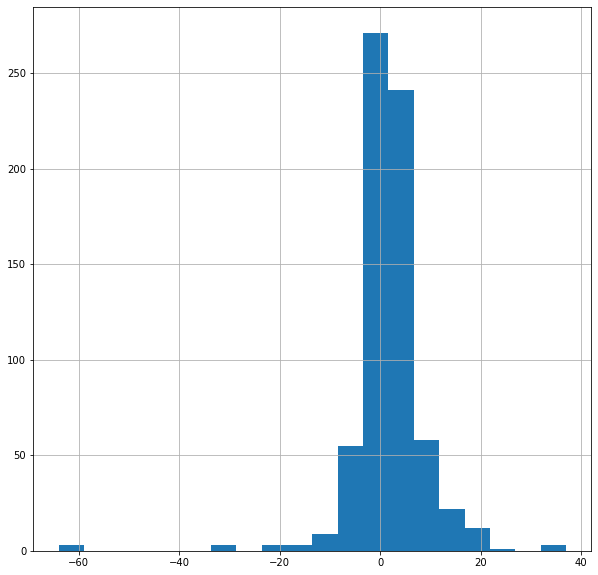

In [20]:
table_1990['Total'].hist(figsize=(10, 10), bins=20)




In [21]:
# create a figure and axis
fig, arr = plt.subplots(5, 1, figsize=(10, 20))

arr[0].hist(table_1990['Total'],bins=20)

arr[1].hist(table_1995['Total'],bins=20)

arr[2].hist(table_2000['Total'],bins=20)

arr[3].hist(table_2005['Total'],bins=20)

arr[4].hist(table_2010['Total'],bins=20)


# set a title and labels
arr[0].set_title('International migrant stock as a percentage of the total population by total number and year,')
arr[0].set_xlabel('Total')
arr[1].set_xlabel('Total')
arr[2].set_xlabel('Total')
arr[3].set_xlabel('Total')
arr[4].set_xlabel('Total')
arr[0].set_ylabel('Count')
arr[1].set_ylabel('Count')
arr[2].set_ylabel('Count')
arr[3].set_ylabel('Count')
arr[4].set_ylabel('Count')




Text(0, 0.5, 'Count')

In [22]:
#select by development
df_by_development = final_table[final_table['Country Code'].isin([901,902])]

In [23]:
df_by_development

Major Area, Region, Country or Area of Destination Notes  Country Code  \
330                                  Developed regions   (b)           901   
331                                  Developed regions   (b)           901   
332                                  Developed regions   (b)           901   
333                                  Developed regions   (b)           901   
334                                  Developed regions   (b)           901   
335                                 Developing regions   (c)           902   
336                                 Developing regions   (c)           902   
337                                 Developing regions   (c)           902   
338                                 Developing regions   (c)           902   
339                                 Developing regions   (c)           902   

    Type of Data  Year    Female      Male  Total  
330          NaN  1990  2.285643  2.265595      2  
331          NaN  1995  2.250995  2.279583      2  
332          NaN  2000  2.529838  2.483259      2  
333          NaN  2005   2.65595  2.265689      2  
334          NaN  2010  1.241097  1.074685      1  
335          NaN  1990 -0.526904  -0.45298      0  
336          NaN  1995  0.081268  0.380246      0  
337          NaN  2000   0.89236  1.693824      1  
338          NaN  2005  2.881555  4.352954      3  
339          NaN  2010  2.933003  2.927058      2

In [24]:
import matplotlib.pyplot as plt

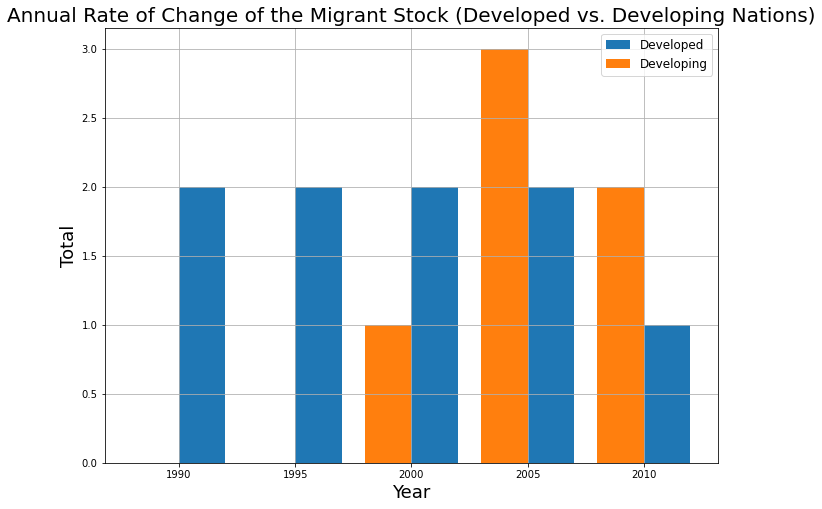

In [30]:
#create developing vs. developed graph
# create a figure and axis
fig, ax = plt.subplots()

# scatter male against female
x = df_by_development['Year'][:5].astype(int)
y1 = df_by_development[df_by_development['Country Code']==901]['Total'].values
y2 = df_by_development[df_by_development['Country Code']==902]['Total'].values
w = 1
rects1 = ax.bar(x+w, y1, width = 2, color='tab:blue', align='center')
rects2 = ax.bar(x-w, y2,  width = 2, color='tab:orange', align='center')

fig.set_size_inches(11, 8)


#ax.xaxis_date()
#ax.autoscale(tight=True)

# set a title and labels
ax.grid(True)
ax.set_title('Annual Rate of Change of the Migrant Stock (Developed vs. Developing Nations)',fontsize=20)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Total',fontsize=18)
ax.legend( (rects1[3], rects2[4]), ('Developed', 'Developing'), fontsize=12 )

In [26]:
#select data by continent
df_by_region = final_table[final_table['Country Code'].isin([903,935,908,909,904, 905])]

In [27]:
df_by_region = final_table[final_table['Country Code'].isin([903,935,908,909,904, 905])]
df_by_region

Major Area, Region, Country or Area of Destination Notes  Country Code  \
5                                               Africa   NaN           903   
6                                               Africa   NaN           903   
7                                               Africa   NaN           903   
8                                               Africa   NaN           903   
9                                               Africa   NaN           903   
60                                                Asia   NaN           935   
61                                                Asia   NaN           935   
62                                                Asia   NaN           935   
63                                                Asia   NaN           935   
64                                                Asia   NaN           935   
405                                             Europe   NaN           908   
406                                             Europe   NaN           908   
407                                             Europe   NaN           908   
408                                             Europe   NaN           908   
409                                             Europe   NaN           908   
630                    Latin America and the Caribbean   NaN           904   
631                    Latin America and the Caribbean   NaN           904   
632                    Latin America and the Caribbean   NaN           904   
633                    Latin America and the Caribbean   NaN           904   
634                    Latin America and the Caribbean   NaN           904   
855                                   Northern America   NaN           905   
856                                   Northern America   NaN           905   
857                                   Northern America   NaN           905   
858                                   Northern America   NaN           905   
859                                   Northern America   NaN           905   
875                                            Oceania   NaN           909   
876                                            Oceania   NaN           909   
877                                            Oceania   NaN           909   
878                                            Oceania   NaN           909   
879                                            Oceania   NaN           909   

    Type of Data  Year    Female      Male  Total  
5            NaN  1990  0.857926  0.798774      0  
6            NaN  1995 -2.159983 -1.848117     -1  
7            NaN  2000  0.045343  0.932749      0  
8            NaN  2005  2.281516  1.872454      2  
9            NaN  2010   3.99651  4.149396      4  
60           NaN  1990 -0.717339  -0.63615      0  
61           NaN  1995  1.041629  1.269413      1  
62           NaN  2000  1.118616  1.941179      1  
63           NaN  2005  3.053337  5.113896      4  
64           NaN  2010  2.583965  2.618984      2  
405          NaN  1990  1.475022  1.363213      1  
406          NaN  1995  1.301226  1.211037      1  
407          NaN  2000  2.659415  2.538277      2  
408          NaN  2005  2.562616  2.291735      2  
409          NaN  2010  1.121519  0.900411      1  
630          NaN  1990 -1.317819 -1.424381     -1  
631          NaN  1995 -0.301938 -0.398563      0  
632          NaN  2000  1.983938  1.810258      1  
633          NaN  2005   2.62221  2.585015      2  
634          NaN  2010  2.288607  2.272761      2  
855          NaN  1990  3.650302  3.898245      3  
856          NaN  1995  3.686675  3.950502      3  
857          NaN  2000  2.272351  2.411456      2  
858          NaN  2005  2.730515  2.118884      2  
859          NaN  2010   1.29213   1.17907      1  
875          NaN  1990  1.424813  0.973073      1  
876          NaN  1995  1.525244  1.080125      1  
877          NaN  2000  2.455792  2.210557      2  
878          NaN  2005  3.345166  3.375269      3  
879          NaN  2010  2

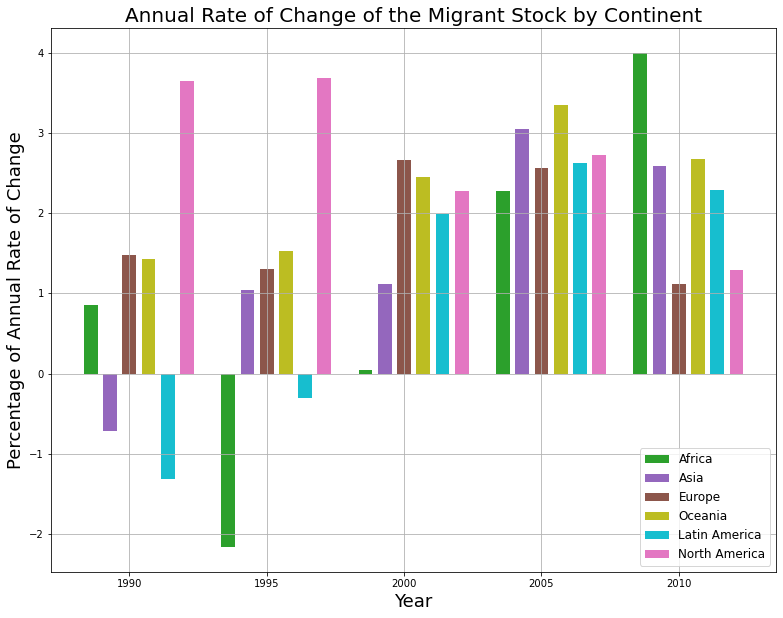

In [28]:
#create continent graph
# create a figure and axis
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# scatter male against female
x = df_by_region['Year'][:5].astype(int)
#903,935,908,909,904, 905
y_africa = df_by_region[df_by_region['Country Code']==903]['Female'].values
y_asia = df_by_region[df_by_region['Country Code']==935]['Female'].values
y_europe = df_by_region[df_by_region['Country Code']==908]['Female'].values
y_oceanian = df_by_region[df_by_region['Country Code']==909]['Female'].values
y_latin = df_by_region[df_by_region['Country Code']==904]['Female'].values
y_north_america = df_by_region[df_by_region['Country Code']==905]['Female'].values
w = 0.7
rects1 = ax.bar(x-2*w, y_africa, width = 0.5, color='tab:green', align='center')
rects2 = ax.bar(x-w, y_asia,  width = 0.5, color='tab:purple', align='center')
rects3 = ax.bar(x, y_europe, width = 0.5, color='tab:brown', align='center')
rects4 = ax.bar(x+1*w, y_oceanian,  width = 0.5, color='tab:olive', align='center')
rects5 = ax.bar(x+2*w, y_latin, width = 0.5, color='tab:cyan', align='center')
rects6 = ax.bar(x+3*w, y_north_america,  width = 0.5, color='tab:pink', align='center')

#ax.xaxis_date()
#ax.autoscale(tight=True)

# set a title and labels
fig.set_size_inches(13, 10)
ax.grid(True)
ax.set_title('Annual Rate of Change of the Migrant Stock by Continent',fontsize=20)
ax.set_xlabel('Year',fontsize=18)
ax.set_ylabel('Percentage of Annual Rate of Change',fontsize=18)
ax.legend( (rects1[0], rects2[0],rects3[0],rects4[0],rects5[0],rects6[0]), 
          ('Africa', 'Asia','Europe','Oceania', 'Latin America', 'North America'), fontsize=12 )